<a href="https://colab.research.google.com/github/TatanPerez/Python_Basico/blob/main/Cuadernillo_1_Se%C3%B1ales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wilmer Sebastian Perez Cuastumal

Cuadernillo 1 (Simulando señal)

22/02/2024

x(t)= 8Cos(100t) + 10Sen(20t) -7Cos(300t - pi/7)

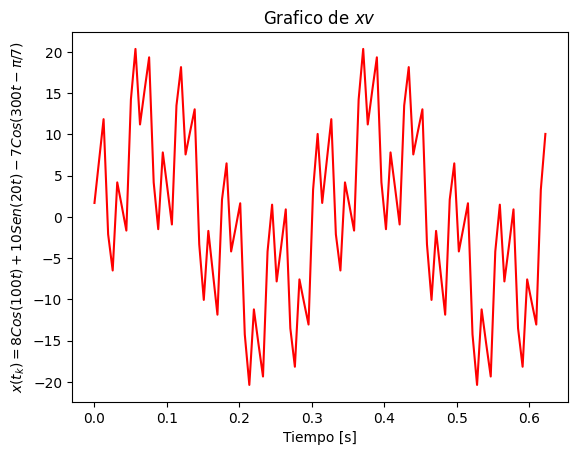

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
A=8
B=10
C=-7
Ts = np.pi/10
ti = 0
t1 = np.pi/50
t2 = np.pi/10
t3 = np.pi/150 # escojemos el mas pequeño
tf = 2*Ts
tv = np.arange(ti,tf,t1/10) # Vector tiempo o muestras
xv= A* np.cos(100*tv)+B* np.sin(20*tv)+C* np.cos(300*tv-np.pi/7)
y=xv
plt.plot(tv, xv,"r")
plt.xlabel('Tiempo [s]')
plt.ylabel('$x(t_k)= 8Cos(100t) + 10Sen(20t) -7Cos(300t - \pi /7)$')
plt.title('Grafico de $xv$')
plt.show()

In [33]:
y_min = 0
y_max = 5
def my_ceropen(x,ymin = -5, ymax = 5): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

In [34]:
yv = my_ceropen(y,ymin=0,ymax=5)

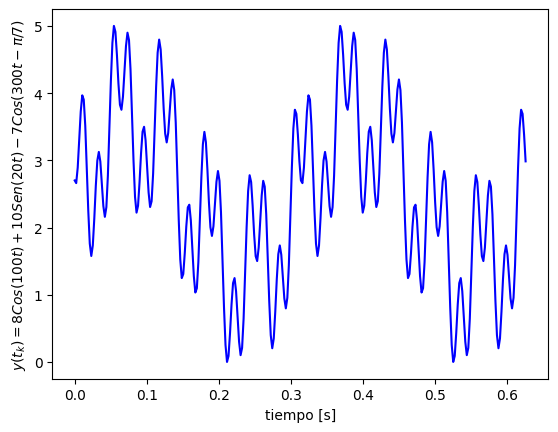

In [18]:
plt.plot(tv,yv,'b')
plt.xlabel('tiempo [s]')
plt.ylabel('$y(t_k)= 8Cos(100t) + 10Sen(20t) -7Cos(300t - \pi /7)$')
plt.show()

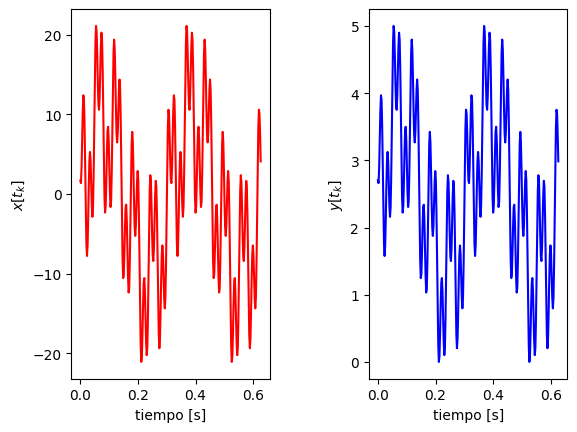

In [12]:
plt.subplot(121) # 1 = #filas, 2 = #columnas, 1 = # dibujo
plt.plot(tv,xv,'r')
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$')

plt.subplot(122)
plt.plot(tv,yv,'b')
plt.xlabel('tiempo [s]')
plt.ylabel('$y[t_k]$')
plt.subplots_adjust(hspace=0.5,wspace=0.5) #ajustar espaciado entre gráficas
plt.show()

In [29]:
# Teniendo cero y pendiente
# número de bits y vector de cuantización
ycs = my_ceropen(y, ymin=0,ymax=5)
nbits = 3
rmin = 0
rmax = 5
ve = np.linspace(rmin,rmax,2**nbits) # (rmax-rmin)/(2^#bits - 1) -> si se quiere incluir rmin y rmax

#distancias y cero pendiente a vector cuantizacion
d = cdist(ycs.reshape(-1,1),ve.reshape(-1,1)) #se utiliza reshape(-1,1) para generar vectores columna como lo pide cdist
d.shape # d es una matriz de 500 x 8, ej: la fila 1 incluye la distancia euclidea entre y[0] y los 8 elementos en ve

(100, 8)

In [30]:
def my_cuantizador(yn, vq) :

  Ne = vq.shape[0]
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))
  ind = np.argmin(dn)
  return vq[ind]

for i in range(ycs.shape[0]):
   if i==0:
     yq = my_cuantizador(ycs[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(ycs[i],ve))

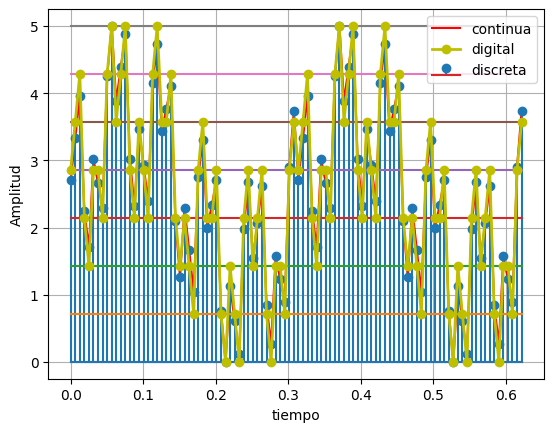

In [32]:
plt.plot(tv,ycs,c='r', label='continua')#cs continua

plt.stem(tv,ycs, label='discreta')#cs discreta

#estados de cuantización

for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='digital', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('tiempo')
plt.ylabel('Amplitud')
plt.show()